In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Annual Income (k$)      200 non-null    int64
 2   Spending Score (1-100)  200 non-null    int64
dtypes: int64(3)
memory usage: 4.8 KB


In [3]:
#scatter plot of anual income and spending score

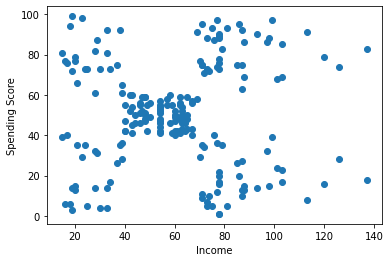

In [14]:
plt.scatter(df["Annual Income (k$)"],df['Spending Score (1-100)'])
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.show()

In [6]:
from sklearn.cluster import KMeans

In [8]:
X= df.iloc[:,[1,2]].values
print(X.shape)

(200, 2)


In [9]:
wcss = []
for i in range(1,16):
    model=KMeans(n_clusters=i)
    model.fit(X)
    wcss.append(model.inertia_)

In [11]:
model = KMeans(n_clusters=1)
model.fit(X)


KMeans(n_clusters=1)

In [12]:
model.inertia_

269981.28000000014

In [13]:
model = KMeans(n_clusters=5)
model.fit(X).predict(X)

array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 3,
       1, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 0, 3, 0, 2, 0, 2, 0,
       3, 0, 2, 0, 2, 0, 2, 0, 2, 0, 3, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [15]:
yhat=model.predict(X)

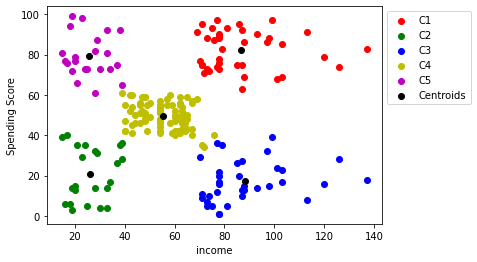

In [21]:
plt.scatter(X[yhat==0,0],X[yhat==0,1],label="C1",c="r")
plt.scatter(X[yhat==1,0],X[yhat==1,1],label="C2",c="g")
plt.scatter(X[yhat==2,0],X[yhat==2,1],label="C3",c="b")
plt.scatter(X[yhat==3,0],X[yhat==3,1],label="C4",c="y")
plt.scatter(X[yhat==4,0],X[yhat==4,1],label="C5",c="m")
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],label="Centroids",c="k")
plt.legend(bbox_to_anchor=(1,1))  #5 centroid in black
plt.xlabel("income")
plt.ylabel("Spending Score")
plt.show()

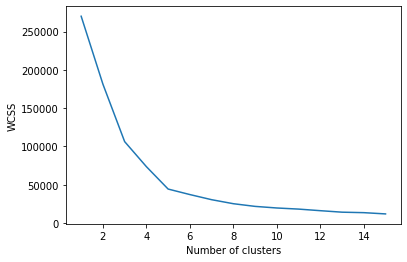

In [20]:
plt.plot(range(1,16),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()